In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
hcho_data = pd.read_csv('preprocessed_dataset/hcho_data.csv')
hcho_data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000263,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000263,Colombo Proper,2019-01-02,2019-01-03
4,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03


In [3]:
# Convert 'Current Date' to datetime format
hcho_data['Current Date'] = pd.to_datetime(hcho_data['Current Date'])

### ARIMA

In [4]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

# ARIMA model parameters
p = range(0, 6)
d = range(0, 5)
q = range(0, 6)
pdq = itertools.product(p, d, q)

best_aic = float('inf')
best_order = None

# Convert the 'Current Date' column to datetime format and set it as the index
hcho_data['Current Date'] = pd.to_datetime(hcho_data['Current Date'])
hcho_data.set_index('Current Date', inplace=True)

# Define the training and testing sets
train_size = int(len(hcho_data) * 0.6)
train_data = hcho_data[:train_size]
test_data = hcho_data[train_size:]

# Iterate over various combinations of p, d, and q to find the best ARIMA model
for order in pdq:
    try:
        model = ARIMA(train_data['HCHO Reading'], order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARIMA{order} - AIC: {aic:.2f}')
    except:
        continue

print(f'Best ARIMA model: ARIMA{best_order} - AIC: {best_aic:.2f}')


ARIMA(0, 0, 0) - AIC: -120667.91
ARIMA(0, 0, 1) - AIC: -122542.65
ARIMA(0, 0, 2) - AIC: -122541.68
ARIMA(0, 0, 3) - AIC: -123048.72
ARIMA(0, 0, 4) - AIC: -123144.94
ARIMA(0, 0, 5) - AIC: -123118.52
ARIMA(0, 1, 0) - AIC: -120768.40
ARIMA(0, 1, 1) - AIC: -122087.27
ARIMA(0, 1, 2) - AIC: -122658.13
ARIMA(0, 1, 3) - AIC: -122660.41
ARIMA(0, 1, 4) - AIC: -122815.95
ARIMA(0, 1, 5) - AIC: -122802.67
ARIMA(0, 2, 0) - AIC: -113416.28
ARIMA(0, 2, 1) - AIC: -119526.71
ARIMA(0, 2, 2) - AIC: -113447.11
ARIMA(0, 2, 3) - AIC: -120921.06
ARIMA(0, 2, 4) - AIC: -113408.37
ARIMA(0, 2, 5) - AIC: -113406.38
ARIMA(0, 3, 0) - AIC: -104792.32
ARIMA(0, 3, 1) - AIC: -104768.84
ARIMA(0, 3, 2) - AIC: -104762.43
ARIMA(0, 3, 3) - AIC: -104764.43
ARIMA(0, 3, 4) - AIC: -104772.02
ARIMA(0, 3, 5) - AIC: -104763.82
ARIMA(0, 4, 0) - AIC: -95603.75
ARIMA(0, 4, 1) - AIC: -95601.43
ARIMA(0, 4, 2) - AIC: -95600.68
ARIMA(0, 4, 3) - AIC: -95606.08
ARIMA(0, 4, 4) - AIC: -95594.24
ARIMA(0, 4, 5) - AIC: -95593.44
ARIMA(1, 0, 0) -

In [8]:
# Define the training and testing sets
train_size = int(len(hcho_data) * 0.8)
train_data = hcho_data[:train_size]
test_data = hcho_data[train_size:]

best_order = (5, 0, 5)

model = ARIMA(train_data['HCHO Reading'], order=best_order)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                10225
Model:                 ARIMA(5, 0, 5)   Log Likelihood               82972.485
Date:                Wed, 27 Mar 2024   AIC                        -165920.970
Time:                        14:24:43   BIC                        -165834.179
Sample:                             0   HQIC                       -165891.625
                              - 10225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.48e-05      1.855      0.064   -6.82e-06       0.000
ar.L1          0.7696      0.000   3974.823      0.000       0.769       0.770
ar.L2         -0.0953      0.000   -491.910      0.000      -0.096      -0.095
ar.L3          0.9094      0.000   4682.766      0.000       0.909       0.910
ar.L4         -0.6430      0.000  -3297.212      0.000      -0.643      -0.643
ar.L5          0.0588      0.000    303.694      0.000       0.058       0.059
ma.L1         -0.3248   1.39e-05  -2.33e+04      0.000      -0.325      -0.325
ma.L2         -0.0455   1.46e-05  -3126.146      0.000      -0.046      -0.045
ma.L3         -0.7815   1.51e-05  -5.17e+04      0.000      -0.782      -0.782
ma.L4          0.1772   1.69e-05   1.05e+04      0.000       0.177       0.177
ma.L5          0.0318   1.64e-05   1943.711      0.000       0.032       0.032
sigma2      5.219e-09   5.37e-11     97.182      0.000    5.11e-09    5.32e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              2703.20
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+19. Standard errors may be unstable.
"""

### FORECASTING

In [9]:
forecast_steps = len(test_data)
forecast = results.forecast(steps=forecast_steps)

print("Forecasted values:")
forecast

Forecasted values:


10225    0.000161
10226    0.000150
10227    0.000125
10228    0.000152
10229    0.000147
           ...   
12777    0.000125
12778    0.000125
12779    0.000125
12780    0.000125
12781    0.000125
Name: predicted_mean, Length: 2557, dtype: float64

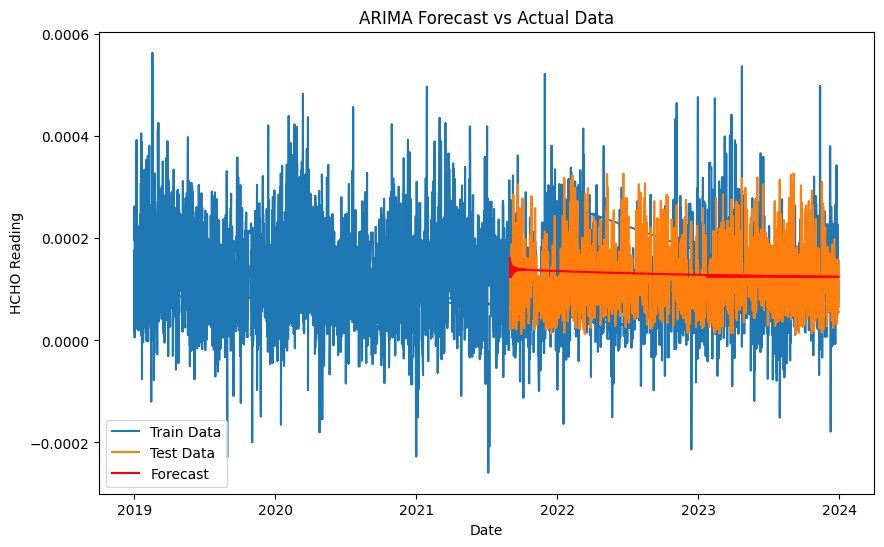

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['HCHO Reading'], label='Train Data')
plt.plot(test_data.index, test_data['HCHO Reading'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()